# More Visualizations

Previously, we saw an overview of how pandas `plot` method worked and how to use the basic API of matplotlib. We'll provide more details in this lesson.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

### Global API

Matplotlib's default pyplot API has a global, MATLAB-style interface, as we've already seen:

In [2]:
x = np.arange(-10, 11)

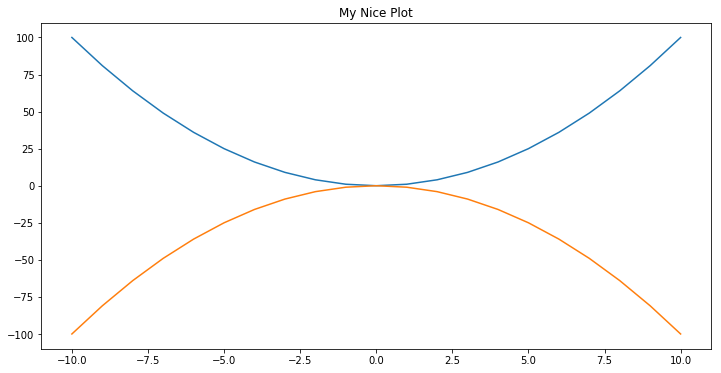

In [3]:
plt.figure(figsize=(12, 6))

plt.title('My Nice Plot')

plt.plot(x, x ** 2)
plt.plot(x, -1 * (x ** 2))


Text(0,0.5,'X Squared')

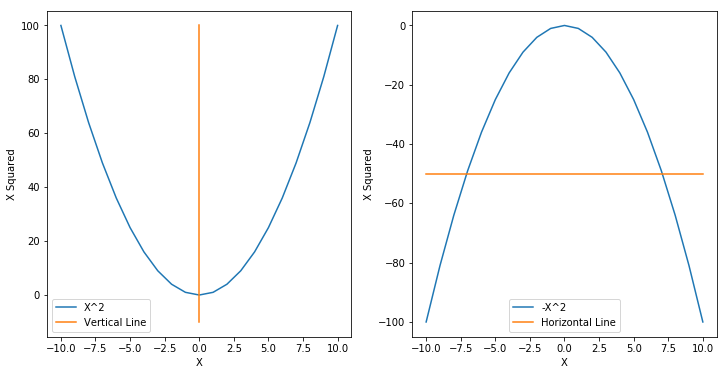

In [4]:
plt.figure(figsize=(12, 6))
plt.title('My Nice Plot')

plt.subplot(1, 2, 1)  # rows, columns, panel selected
plt.plot(x, x ** 2)
plt.plot([0, 0, 0], [-10, 0, 100])
plt.legend(['X^2', 'Vertical Line'])
plt.xlabel('X')
plt.ylabel('X Squared')

plt.subplot(1, 2, 2)
plt.plot(x, -1 * (x ** 2))
plt.plot([-10, 0, 10], [-50, -50, -50])
plt.legend(['-X^2', 'Horizontal Line'])

plt.xlabel('X')
plt.ylabel('X Squared')

### OOP Interface

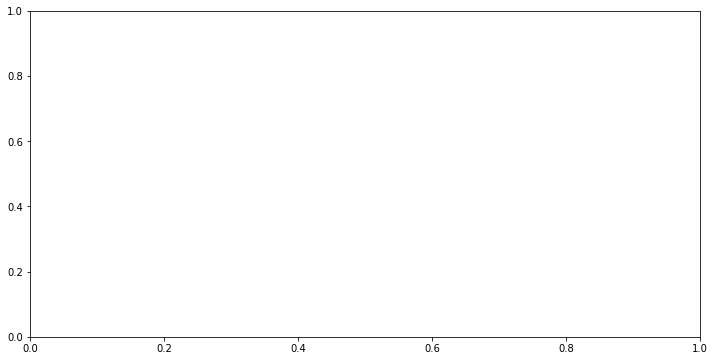

In [5]:
fig, axes = plt.subplots(figsize=(12, 6))

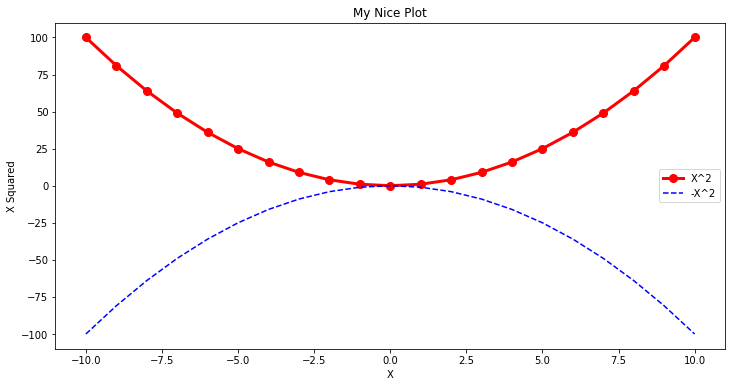

In [6]:
axes.plot(
    x, (x ** 2), color='red', linewidth=3,
    marker='o', markersize=8, label='X^2')

axes.plot(x, -1 * (x ** 2), 'b--', label='-X^2')

axes.set_xlabel('X')
axes.set_ylabel('X Squared')

axes.set_title("My Nice Plot")

axes.legend()

fig

Text(0.5,1,'My Nice Plot')

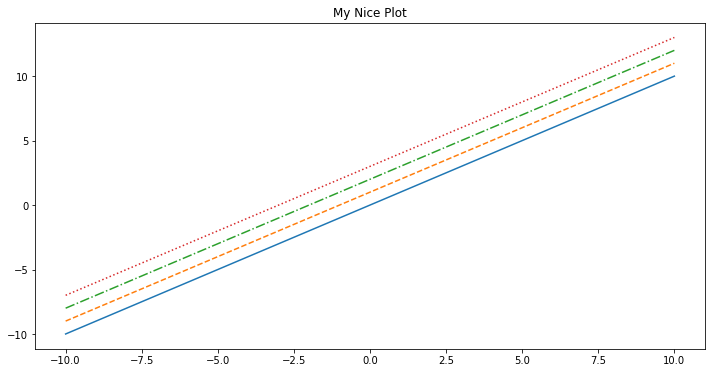

In [7]:
fig, axes = plt.subplots(figsize=(12, 6))

axes.plot(x, x + 0, linestyle='solid')
axes.plot(x, x + 1, linestyle='dashed')
axes.plot(x, x + 2, linestyle='dashdot')
axes.plot(x, x + 3, linestyle='dotted');

axes.set_title("My Nice Plot")

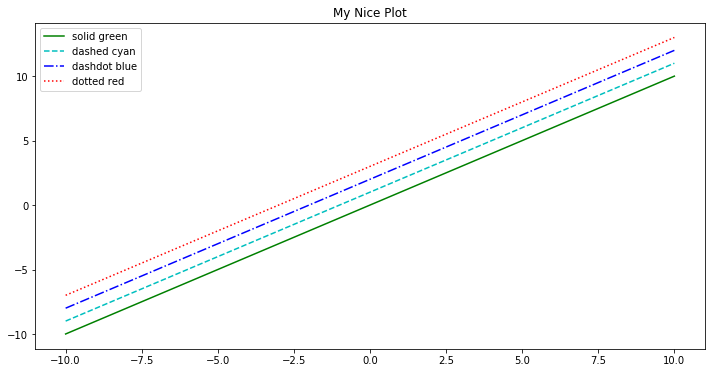

In [8]:
fig, axes = plt.subplots(figsize=(12, 6))

axes.plot(x, x + 0, '-g', label="solid green")
axes.plot(x, x + 1, '--c', label="dashed cyan")
axes.plot(x, x + 2, '-.b', label="dashdot blue")
axes.plot(x, x + 3, ':r', label="dotted red")

axes.set_title("My Nice Plot")

axes.legend()

# Other types of plots

### Scatter Plot

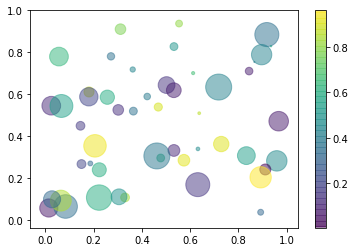

In [9]:
N = 50
x = np.random.rand(N)
y = np.random.rand(N)
colors = np.random.rand(N)
area = np.pi * (15 * np.random.rand(N))**2  # 0 to 15 point radii

plt.scatter(x, y, s=area, c=colors, alpha=0.5, cmap='viridis')
plt.colorbar()
plt.show()

### Histograms

In [10]:
values = np.random.randn(1000)

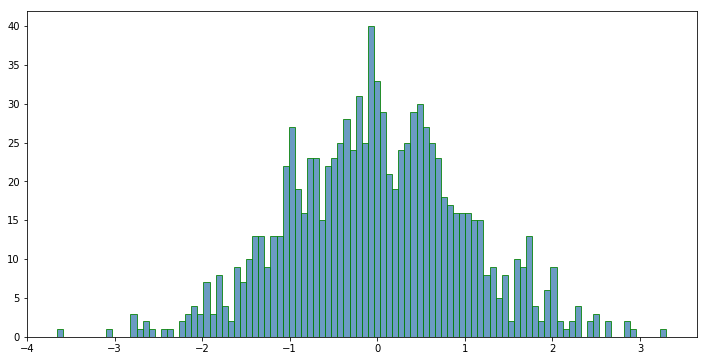

In [11]:
fig, axes = plt.subplots(figsize=(12, 6))
axes.hist(values, bins=100, alpha=0.8,
          histtype='bar', color='steelblue',
          edgecolor='green');


In [12]:
fig.savefig('hist.png')

### Boxplots and outlier detection

In [13]:
values = np.concatenate([np.random.randn(10), np.array([10, 15, -10, -15])])

(array([1., 1., 0., 0., 6., 4., 0., 0., 1., 1.]),
 array([-15., -12.,  -9.,  -6.,  -3.,   0.,   3.,   6.,   9.,  12.,  15.]),
 <a list of 10 Patch objects>)

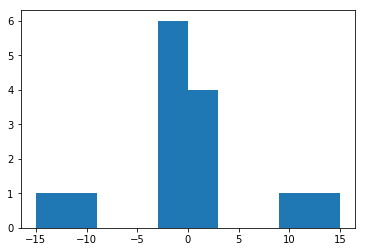

In [14]:
plt.hist(values)

{'whiskers': [<matplotlib.lines.Line2D at 0x105d80978>,
 'caps': [<matplotlib.lines.Line2D at 0x105d87278>,
 'boxes': [<matplotlib.lines.Line2D at 0x105d80828>],
 'medians': [<matplotlib.lines.Line2D at 0x105d87ac8>],
 'fliers': [<matplotlib.lines.Line2D at 0x105d87ef0>],
 'means': []}

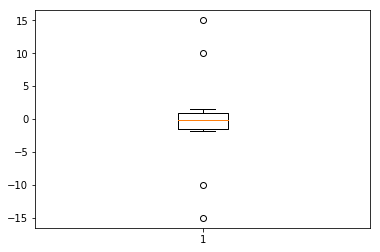

In [15]:
plt.boxplot(values)

### Example. Invalid prices

In [16]:
df = pd.read_csv(
    'data/btc-eth-prices.csv',
    index_col=0,
    parse_dates=True
)

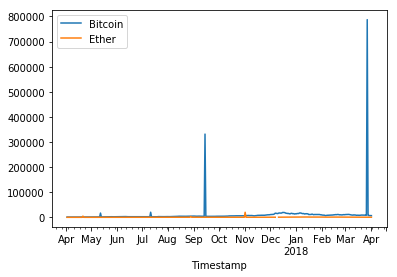

In [17]:
df.plot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1060fe0b8>]],
      dtype=object)

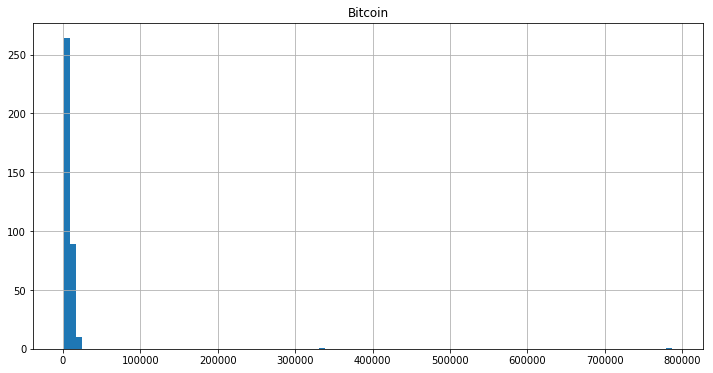

In [18]:
df[['Bitcoin']].hist(bins=100, figsize=(12, 6))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1062272e8>]],
      dtype=object)

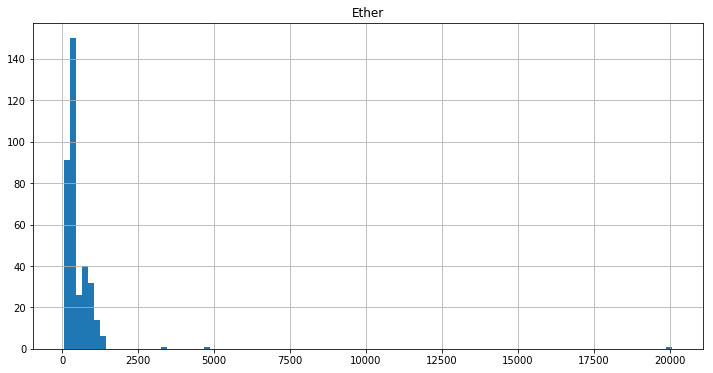

In [19]:
df[['Ether']].hist(bins=100, figsize=(12, 6))

In [20]:
df.quantile(.9)

Bitcoin    14076.2954
Ether        937.0130
Name: 0.9, dtype: float64

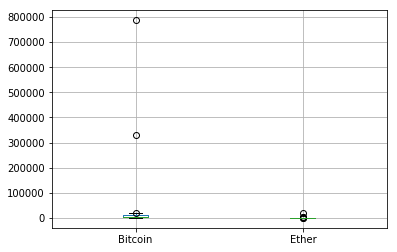

In [21]:
df.boxplot()

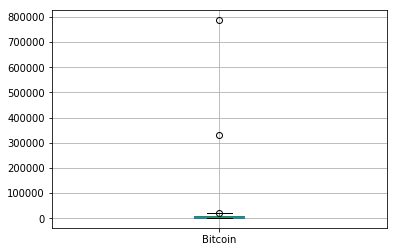

In [22]:
df.boxplot(column=['Bitcoin'])

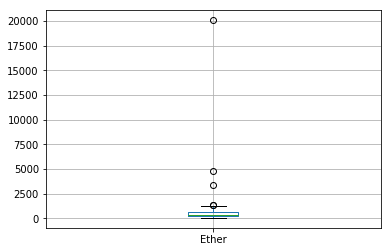

In [23]:
df.boxplot(column=['Ether'])

In [24]:
df.describe()

,Bitcoin,Ether
count,365.000000,362.000000
mean,9484.697529,506.203757
std,44457.245303,1112.117333
min,1099.169125,42.310000
25%,2599.729838,241.945000
50%,4641.822017,309.730000
75%,9696.593333,683.777500
max,787116.195000,20089.420000


Detecting outliers with z-scores:

In [25]:
df.loc[df['Bitcoin'] > df['Bitcoin'].mean() + (df['Bitcoin'].std()), ['Bitcoin']]

,Bitcoin
Timestamp,
2017-09-14,331449.630
2018-03-27,787116.195


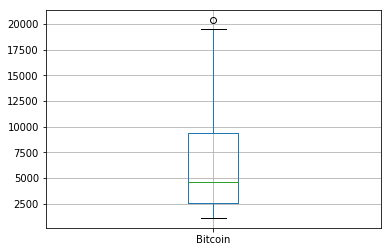

In [26]:
df.loc[df['Bitcoin'] < df['Bitcoin'].mean() + (.5 * df['Bitcoin'].std()), ['Bitcoin']].boxplot()

Or by using quantiles

In [27]:
df[df['Bitcoin'] > df['Bitcoin'].quantile(.99)]

,Bitcoin,Ether
Timestamp,,
2017-07-11,20369.862129,190.55
2017-09-14,331449.630000,223.14
2017-12-16,19498.683333,692.83
2018-03-27,787116.195000,448.78


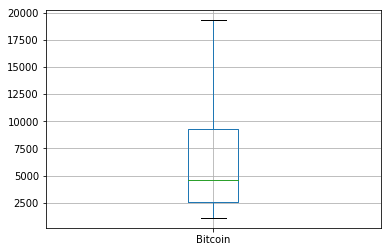

In [28]:
df[df['Bitcoin'] < df['Bitcoin'].quantile(.99)].boxplot(column='Bitcoin')

### A quick intro to Seaborn

In [29]:
import seaborn as sns
sns.set(color_codes=True)

/Users/santiagobasulto/.virtualenvs/ds-classes/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


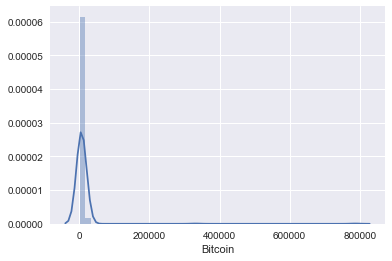

In [30]:
sns.distplot(df['Bitcoin'])

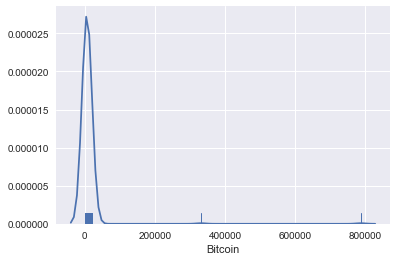

In [31]:
sns.distplot(df['Bitcoin'], hist=False, rug=True);

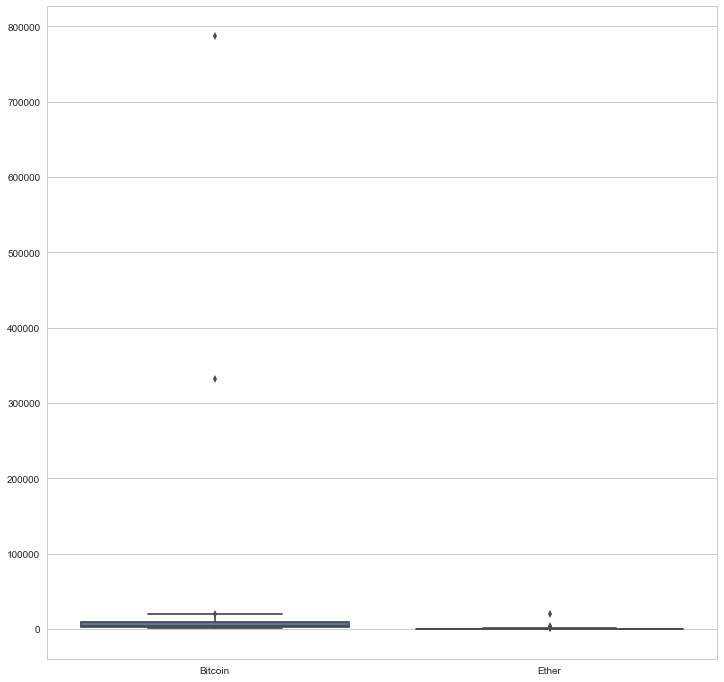

In [32]:
sns.set_style("whitegrid")
fig = plt.figure(figsize=(12, 12))
sns.boxplot(data=df, palette="deep",)


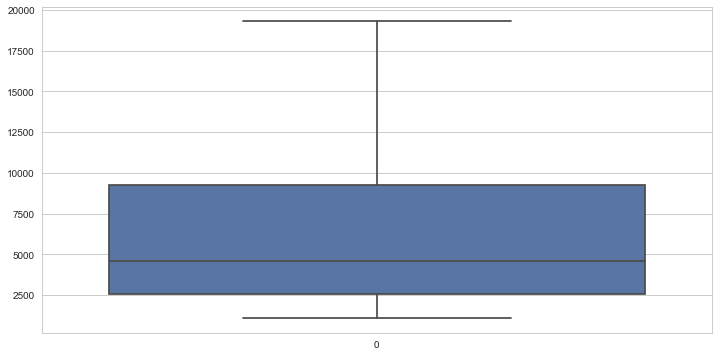

In [33]:
sns.set_style("whitegrid")
fig = plt.figure(figsize=(12, 6))

data = df.loc[df['Bitcoin'] < df['Bitcoin'].quantile(.99), 'Bitcoin']
sns.boxplot(data=data, palette="deep")
